# time dependence
Fig 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('dataMoreDuration/data_trend.csv')
data = data[data.duration<300]
inject_values = np.unique(data.echoamplitude_injected)
duration_center_array = [0.4,1, 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,19, 20, 21,40,100,200]


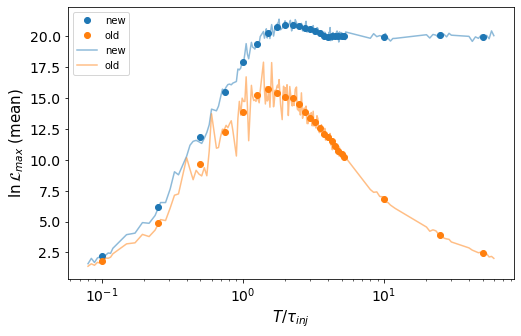

In [3]:
echoamplitude = 0.1
datanew = data[data["echoamplitude_injected"]==echoamplitude]
x = []
y_new = []
y_old = []
for duration in duration_center_array:
    if (duration<1) or (duration>21):
        datanew2 = datanew[(datanew.duration<1.21*duration)&(datanew.duration>0.79*duration)]
    else:
        datanew2 = datanew[(datanew.duration<duration+0.41)&(datanew.duration>duration-0.41)]
    x = np.append(x,np.mean(datanew2.duration))
    y_new = np.append(y_new,np.mean(datanew2["log_likelihood_new"]))
    y_old = np.append(y_old,np.mean(datanew2["log_likelihood_old"]))
arg = np.argsort(x)
x = x[arg]
y_new = y_new[arg]
y_old = y_old[arg]

plt.figure(figsize=(8,5))
plt.errorbar(datanew["duration"]/4,datanew["log_likelihood_new"],alpha = 0.5,label = 'new')
plt.errorbar(datanew["duration"]/4,datanew["log_likelihood_old"],alpha = 0.5,label = 'old')
plt.plot(x/4,y_new,"o",label = 'new',c = 'C0')
plt.plot(x/4,y_old,"o",label = 'old',c = 'C1')

plt.legend()
plt.xlabel('$T/τ_{inj}$',fontsize = 15)
plt.xscale('log')
plt.ylabel('$\ln \mathcal{L}_{max}$ (mean)', fontsize = 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
# plt.title('injected echo amplitude = %.3f, SNR = %.2f '%(echoamplitude,np.mean(datanew[datanew.duration>40]["SNR"])))
echoamplitude = 0.25
datanew = data[data["echoamplitude_injected"]==echoamplitude]
x = []
y_new = []
y_old = []
for duration in duration_center_array:
    if (duration<1) or (duration>21):
        datanew2 = datanew[(datanew.duration<1.21*duration)&(datanew.duration>0.79*duration)]
    else:
        datanew2 = datanew[(datanew.duration<duration+0.41)&(datanew.duration>duration-0.41)]
    x = np.append(x,np.mean(datanew2.duration))
    y_new = np.append(y_new,np.mean(datanew2["log_likelihood_new"]))
    y_old = np.append(y_old,np.mean(datanew2["log_likelihood_old"]))
arg = np.argsort(x)
x = x[arg]
y_new = y_new[arg]
y_old = y_old[arg]

plt.savefig('TLogL.pdf',bbox_inches='tight',pad_inches=0.1,dpi=300)


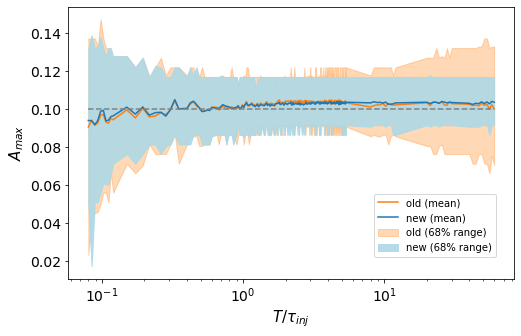

In [4]:
echoamplitude = 0.1
datanew = data[data["echoamplitude_injected"]==echoamplitude]
plt.figure(figsize=(8,5))
# plt.subplot(1,2,1)
plt.plot(datanew['duration']/4,datanew['echoamplitude_searched_old'],label = "old (mean)",color='C1')
plt.plot(datanew['duration']/4,datanew['echoamplitude_searched_new'],label = "new (mean)",color='C0')
plt.plot(datanew['duration']/4,datanew['echoamplitude_injected'],'--',color='gray')
plt.fill_between(datanew['duration']/4,datanew['echoamplitude_searched_old_error_down'],datanew['echoamplitude_searched_old_error_up'],alpha=0.3,label = "old (68% range)",color='C1')
plt.fill_between(datanew['duration']/4,datanew['echoamplitude_searched_new_error_down'],datanew['echoamplitude_searched_new_error_up'],alpha=0.9,label = "new (68% range)",color='lightblue')
plt.xscale("log")
plt.legend(bbox_to_anchor=(0.97, 0.33))
plt.xlabel('$T/τ_{inj}$',fontsize = 15)
#plt.xscale('log')
plt.ylabel('$A_{max}$', fontsize = 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
# plt.title('injected echoamplitude = %.3f,'%(echoamplitude))
echoamplitude = 0.25
datanew = data[data["echoamplitude_injected"]==echoamplitude]
plt.savefig('TARange.pdf',bbox_inches='tight',pad_inches=0.1,dpi=300)
plt.show()
plt.close()

# injected amplitude dependence
Fig 2

In [7]:
data = pd.read_csv("dataMoreAmplitude/data_trend_new.csv")
inject_values = np.unique(data.echoamplitude_injected.values)
duration_array = np.unique(data.duration.values)

list1=datanew1['echoamplitude_injected']/datanew1['normalized_echoamplitude_injected']
list2=datanew2['echoamplitude_injected']/datanew2['normalized_echoamplitude_injected']

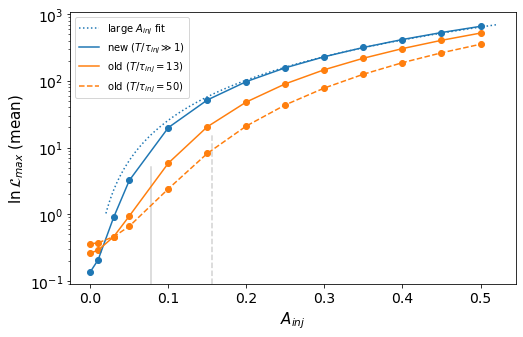

In [9]:
duration = 50
datanew1 = data[data["duration"]==duration]
duration = 200
datanew2 = data[data["duration"]==duration]
plt.figure(figsize=(8,5))
#plt.errorbar(datanew["echoamplitude_injected"],datanew["log_likelihood_new"],datanew["log_likelihood_new_error"],label = 'duration = %.1f,new'%duration)
#plt.errorbar(datanew["echoamplitude_injected"],datanew["log_likelihood_old"],datanew["log_likelihood_old_error"],label = 'duration = %.1f,old'%duration)
plt.errorbar(datanew1["echoamplitude_injected"],datanew1["log_likelihood_new"],label = 'new ($T/τ_{inj}\gg 1$)')
plt.errorbar(datanew1["echoamplitude_injected"],datanew1["log_likelihood_old"],label = 'old ($T/τ_{inj}=13$)')
plt.plot(datanew1["echoamplitude_injected"],datanew1["log_likelihood_new"],'o',c='C0')
x = np.linspace(0.02,0.52, 200)
plt.plot(x, 2570*x**2,color='C0',linestyle=':',label = 'large $A_{inj}$ fit')
# plt.plot(x, 5500*x**3,color='C0',linestyle=':',label = 'large $A_{inj}$ fit')
plt.plot(datanew1["echoamplitude_injected"],datanew1["log_likelihood_old"],'o',c='C1')
plt.errorbar(datanew2["echoamplitude_injected"],datanew2["log_likelihood_old"],label = 'old ($T/τ_{inj}=50$)',c='C1',linestyle='--')
plt.plot(datanew2["echoamplitude_injected"],datanew2["log_likelihood_old"],'o',c='C1')
plt.axvline(x=np.mean(list1), ymin=0, ymax=0.43, c='lightgray')
plt.axvline(x=np.mean(list2), ymin=0., ymax=0.55, c='lightgray', linestyle='--')
#plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xlabel('$A_{inj}$',fontsize = 15)
#plt.xscale('log')
plt.ylabel('$\ln \mathcal{L}_{max}$ (mean)', fontsize = 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
# plt.title('injected echo duration = %.1f,'%(duration))
plt.savefig('ALogL.pdf',bbox_inches='tight',pad_inches=0.1,dpi=300)
plt.show()
plt.close()

In [10]:
data = pd.read_csv('dataMoreAmplitude/data_trend_new.csv')
inject_values = np.unique(data.echoamplitude_injected.values)
duration_array = np.unique(data.duration.values)

/tmp/ipykernel_3491192/2251868588.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(datanew1['echoamplitude_injected'],datanew1['echoamplitude_injected'],'-',color='gray',linestyle='--')


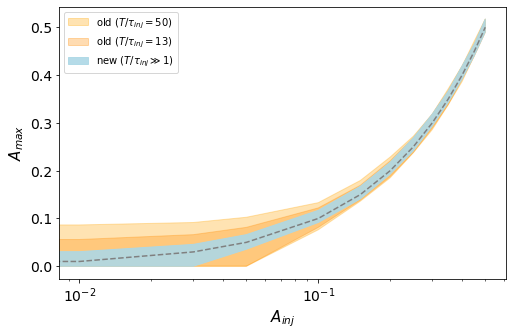

In [11]:
duration =50
datanew1 = data[data["duration"]==duration]
duration =200
datanew2 = data[data["duration"]==duration]
plt.figure(figsize=(8,5))

plt.plot(datanew1['echoamplitude_injected'],datanew1['echoamplitude_injected'],'-',color='gray',linestyle='--')
plt.fill_between(datanew2['echoamplitude_injected'],datanew2['echoamplitude_searched_old_error_down'],datanew2['echoamplitude_searched_old_error_up'],alpha=0.3,label = "old ($T/τ_{inj}=50$)",color='orange')
plt.fill_between(datanew1['echoamplitude_injected'],datanew1['echoamplitude_searched_old_error_down'],datanew1['echoamplitude_searched_old_error_up'],alpha=0.3,label = "old ($T/τ_{inj}=13$)",color='darkorange')
plt.fill_between(datanew1['echoamplitude_injected'],datanew1['echoamplitude_searched_new_error_down'],datanew1['echoamplitude_searched_new_error_up'],alpha=0.9,label = "new ($T/τ_{inj}\gg 1$)",color='lightblue')

plt.legend()
plt.xlabel('$A_{inj}$', fontsize = 15)

plt.ylabel('$A_{max}$', fontsize = 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xscale("log")
plt.savefig('AARange.pdf',bbox_inches='tight',pad_inches=0.1,dpi=300)
plt.show()
plt.close()

# SNR ~ likelihood dependence
Fig 16

In [1]:
import pandas as pd
import scipy
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

from scipy.special import ive as Ive
from scipy.special import iv as Iv
def logi0(x):
    return np.log(Ive(0,x))+np.abs(x)
def error(x):
    return (np.percentile(x,84)-np.percentile(x,16))/2

from glob import glob

file_index = glob("../uniew_injection/*1000*/*_newlikelihood*.csv")
file_index = [file for file in file_index if "0.000" not in file]
file_index = [file for file in file_index if "qfactor" not in file]
file_index.sort()
file_index

['../uniew_injection/npoints=1000_duration=12_4parameter_HWP/4parameter_echoamplitude=0.077_newlikelihood_all.csv',
 '../uniew_injection/npoints=1000_duration=1_4parameter_HWP/4parameter_echoamplitude=0.077_newlikelihood_all.csv',
 '../uniew_injection/npoints=1000_duration=1_n10_4parameter_HWP/4parameter_echoamplitude=0.140_newlikelihood_all.csv',
 '../uniew_injection/npoints=1000_duration=24_4parameter_HWP/4parameter_echoamplitude=0.077_newlikelihood_all.csv',
 '../uniew_injection/npoints=1000_duration=2_4parameter_HWP/4parameter_echoamplitude=0.077_newlikelihood_all.csv',
 '../uniew_injection/npoints=1000_duration=3_4parameter_HWP/4parameter_echoamplitude=0.077_newlikelihood_all.csv',
 '../uniew_injection/npoints=1000_duration=4_4parameter_HWP/4parameter_echoamplitude=0.077_newlikelihood_all.csv',
 '../uniew_injection/npoints=1000_duration=52_4parameter_HWP/4parameter_echoamplitude=0.077_newlikelihood_all.csv',
 '../uniew_injection/npoints=1000_duration=52_n10_4parameter_HWP/4paramet

In [2]:
spacing_q_index = [25,50]
file_index_q = glob("../uniew_injection/*2000*/*_newlikelihood*.csv")
file_index_q = [file for file in file_index_q if "qfactor" in file]
file_index_q

['../uniew_injection/npoints=2000_qfactor=200_priorscaled_Tfactor100_4parameter_HWP_new/4parameter_echoamplitude=0.054_newlikelihood_all.csv',
 '../uniew_injection/npoints=2000_qfactor=100_priorscaled_4parameter_HWP_new/4parameter_echoamplitude=0.077_newlikelihood_all.csv']

In [3]:
datanew = pd.read_csv("dataMoreAmplitude/data_trend_new.csv")

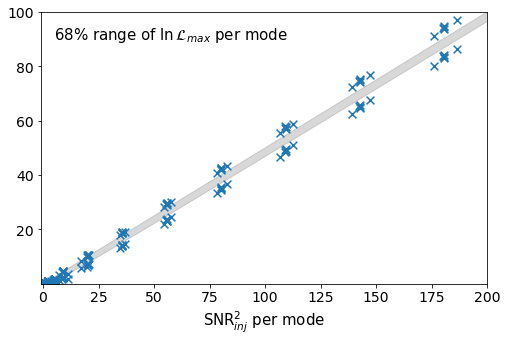

In [4]:
plt.figure(figsize=(8,5))
x_new = np.linspace(0,22,200)
plt.fill_between(x_new**2,logi0(x_new**2)-x_new**2/2,x_new**2/2,alpha=0.3,color='gray')
plt.scatter(datanew["SNR"]**2/6,datanew["log_likelihood_new_error_up"]/6,color='C0',marker='x',s=60)
plt.scatter(datanew["SNR"]**2/6,datanew["log_likelihood_new_error_down"]/6,color='C0',marker='x',s=60)
for index in np.arange(0,len(file_index)):
    file = file_index[index]
    data = pd.read_csv(file)
    Nmode = (data["fmax_median"]-data["fmin_median"])/5.83
    lnLup = np.percentile(data["maxloglikelihood"]/Nmode,84)
    lnLdown = np.percentile(data["maxloglikelihood"]/Nmode,16)
    SNRnm = np.mean(data["SNR_comb_signal"]**2/Nmode)
    # plt.scatter(SNRnm,lnLup,color='C1',marker='x',s=60)
    # plt.scatter(SNRnm,lnLdown,color='C1',marker='x',s=60)
    plt.scatter(SNRnm,lnLup,color='C0',marker='x',s=60)
    plt.scatter(SNRnm,lnLdown,color='C0',marker='x',s=60)    
    plt.xlabel('SNR$_{inj}^2$ per mode',fontsize = 15)  
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
for index in np.arange(0,len(file_index_q)):
    file = file_index_q[index]
    data = pd.read_csv(file)
    Nmode = (data["fmax_median"]-data["fmin_median"])/spacing_q_index[index]
    lnLup = np.percentile(data["maxloglikelihood"]/Nmode,84)
    lnLdown = np.percentile(data["maxloglikelihood"]/Nmode,16)
    SNRnm = np.mean(data["SNR_comb_signal"]**2/Nmode)
    # plt.scatter(SNRnm,lnLup,color='C1',marker='x',s=60)
    # plt.scatter(SNRnm,lnLdown,color='C1',marker='x',s=60)
    plt.scatter(SNRnm,lnLup,color='C0',marker='x',s=60)
    plt.scatter(SNRnm,lnLdown,color='C0',marker='x',s=60)    
    plt.xlabel('SNR$_{inj}^2$ per mode',fontsize = 15)  
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    
plt.text(5,90,'68% range of $\ln\mathcal{L}_{max}$ per mode',fontsize = 15)    
plt.xlim(-1,200)
plt.ylim(0.02,100)
plt.savefig('SNR2LogL.pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
plt.close()

/tmp/ipykernel_3669686/1274179600.py:4: RuntimeWarning: divide by zero encountered in true_divide
  plt.fill_between(x_new,1+1/x_new**1,1-1/x_new**1,alpha=0.2,color='gray')


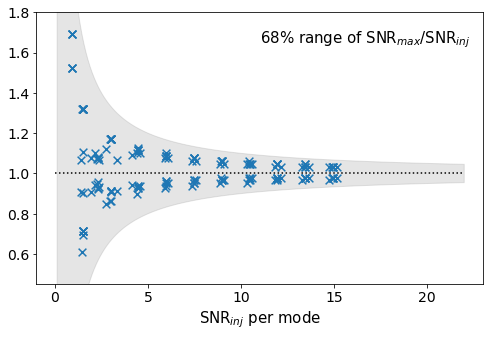

In [5]:
plt.figure(figsize=(8,5))
x_new = np.linspace(0,22,200)
plt.plot(x_new,x_new**0,':',color='black')
plt.fill_between(x_new,1+1/x_new**1,1-1/x_new**1,alpha=0.2,color='gray')
plt.scatter(np.sqrt(datanew["SNR"]**2/6),datanew['echoamplitude_searched_new_error_up']/datanew['echoamplitude_injected'],color='C0',marker='x',s=60)
plt.scatter(np.sqrt(datanew["SNR"]**2/6),datanew['echoamplitude_searched_new_error_down']/datanew['echoamplitude_injected'],color='C0',marker='x',s=60)
for index in np.arange(0,len(file_index)):
    file = file_index[index]
    data = pd.read_csv(file)
    Nmode = (data["fmax_median"]-data["fmin_median"])/5.83
    SNRnsm = np.mean(data["SNR_comb_global"]/np.sqrt(Nmode))
    SNRnsup = np.percentile(data["SNR_comb_global"]/np.sqrt(Nmode),84)
    SNRnsdown = np.percentile(data["SNR_comb_global"]/np.sqrt(Nmode),16)
    SNRnm = np.mean(data["SNR_comb_signal"]/np.sqrt(Nmode))
    # plt.scatter(SNRnm,SNRnsup/SNRnm,color='C1',marker='x',s=60)
    # plt.scatter(SNRnm,SNRnsdown/SNRnm,color='C1',marker='x',s=60)
    plt.scatter(SNRnm,SNRnsup/SNRnm,color='C0',marker='x',s=60)
    plt.scatter(SNRnm,SNRnsdown/SNRnm,color='C0',marker='x',s=60)
for index in np.arange(0,len(file_index_q)):
    file = file_index_q[index]
    data = pd.read_csv(file)
    Nmode = (data["fmax_median"]-data["fmin_median"])/spacing_q_index[index]
    SNRnsm = np.mean(data["SNR_comb_global"]/np.sqrt(Nmode))
    SNRnsup = np.percentile(data["SNR_comb_global"]/np.sqrt(Nmode),84)
    SNRnsdown = np.percentile(data["SNR_comb_global"]/np.sqrt(Nmode),16)
    SNRnm = np.mean(data["SNR_comb_signal"]/np.sqrt(Nmode))
    # plt.scatter(SNRnm,SNRnsup/SNRnm,color='C1',marker='x',s=60)
    # plt.scatter(SNRnm,SNRnsdown/SNRnm,color='C1',marker='x',s=60)
    plt.scatter(SNRnm,SNRnsup/SNRnm,color='C0',marker='x',s=60)
    plt.scatter(SNRnm,SNRnsdown/SNRnm,color='C0',marker='x',s=60)
    
plt.xlabel('SNR$_{inj}$ per mode',fontsize = 15)
plt.text(11,1.65,'68% range of SNR$_{max}$/SNR$_{inj}$',fontsize = 15)    
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylim(0.45,1.8)
plt.xlim(-1,23)
plt.savefig('SNRSNRsearch.pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
plt.close()

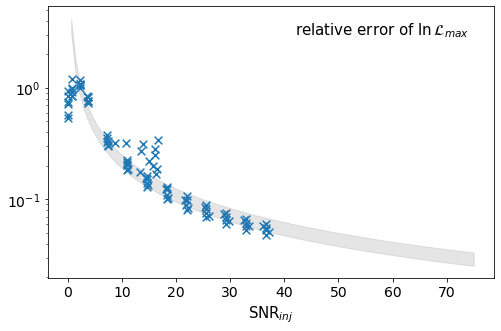

In [6]:
plt.figure(figsize=(8,5))
x_new = np.linspace(0.6,75,100)
plt.fill_between(x_new,1.9/x_new**1, 2.5/x_new**1,alpha=0.2,color='gray')
plt.scatter(np.sqrt(datanew["SNR"]**2),datanew["log_likelihood_new_error"]/datanew["log_likelihood_new"],color='C0',marker='x',s=60)
for index in np.arange(0,len(file_index)):
    file = file_index[index]
    data = pd.read_csv(file)
    Nmode = (data["fmax_median"]-data["fmin_median"])/5.83
    lnLm = np.mean(data["maxloglikelihood"])
    lnLerror = error(data["maxloglikelihood"])
    SNRm = np.mean(data["SNR_comb_signal"])
    # plt.scatter(SNRm,lnLerror/lnLm,color='C1',marker='x',s=60)
    plt.scatter(SNRm,lnLerror/lnLm,color='C0',marker='x',s=60)
for index in np.arange(0,len(file_index_q)):
    file = file_index_q[index]
    data = pd.read_csv(file)
    Nmode = (data["fmax_median"]-data["fmin_median"])/spacing_q_index[index]
    lnLm = np.mean(data["maxloglikelihood"])
    lnLerror = error(data["maxloglikelihood"])
    SNRm = np.mean(data["SNR_comb_signal"])
    # plt.scatter(SNRm,lnLerror/lnLm,color='C2',marker='x',s=60)
    plt.scatter(SNRm,lnLerror/lnLm,color='C0',marker='x',s=60)
plt.xlabel('SNR$_{inj}$',fontsize = 15)
plt.yscale('log')
plt.text(42,3,'relative error of $\ln\mathcal{L}_{max}$',fontsize = 15)    
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.savefig('SNRLogLerror.pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
plt.close()

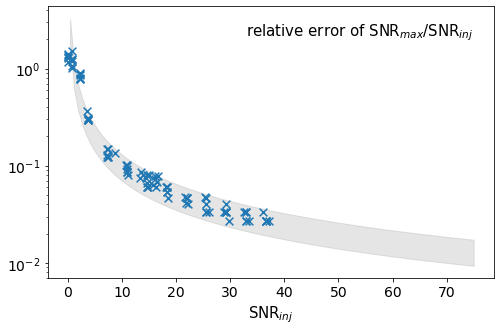

In [7]:
plt.figure(figsize=(8,5))
x_new = np.linspace(0.4,75,100)
plt.fill_between(x_new,0.7/x_new**1,1.3/x_new**1,alpha=0.2,color='gray')
plt.scatter(np.sqrt(datanew["SNR"]**2),datanew['echoamplitude_searched_new_error']/datanew['echoamplitude_searched_new'],color='C0',marker='x',s=60)
for index in np.arange(0,len(file_index)):
    file = file_index[index]
    data = pd.read_csv(file)
    Nmode = (data["fmax_median"]-data["fmin_median"])/5.83
    SNRsm = np.mean(data["SNR_comb_global"])
    SNRnserror = error(data["SNR_comb_global"])
    SNRm = np.mean(data["SNR_comb_signal"])
    # plt.scatter(SNRm,SNRnserror/SNRm,color='C1',marker='x',s=60)
    plt.scatter(SNRm,SNRnserror/SNRm,color='C0',marker='x',s=60)
for index in np.arange(0,len(file_index_q)):
    file = file_index_q[index]
    data = pd.read_csv(file)
    Nmode = (data["fmax_median"]-data["fmin_median"])/spacing_q_index[index]
    SNRsm = np.mean(data["SNR_comb_global"])
    SNRnserror = error(data["SNR_comb_global"])
    SNRm = np.mean(data["SNR_comb_signal"])
    # plt.scatter(SNRm,SNRnserror/SNRm,color='C2',marker='x',s=60)
    plt.scatter(SNRm,SNRnserror/SNRm,color='C0',marker='x',s=60)
    
plt.xlabel('SNR$_{inj}$',fontsize = 15)
plt.yscale('log')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.text(33,2.2,'relative error of SNR$_{max}$/SNR$_{inj}$',fontsize = 15)    
plt.savefig('SNRSNRsearcherror.pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
plt.close()